# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import helper
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 12818749.54it/s]


Extracting /Users/christianvanellnielsen/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/christianvanellnielsen/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 1616205.58it/s]

Extracting /Users/christianvanellnielsen/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/christianvanellnielsen/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 14492563.01it/s]


Extracting /Users/christianvanellnielsen/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/christianvanellnielsen/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3268585.68it/s]


Extracting /Users/christianvanellnielsen/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/christianvanellnielsen/.pytorch/F_MNIST_data/FashionMNIST/raw



Here we can see one of the images.

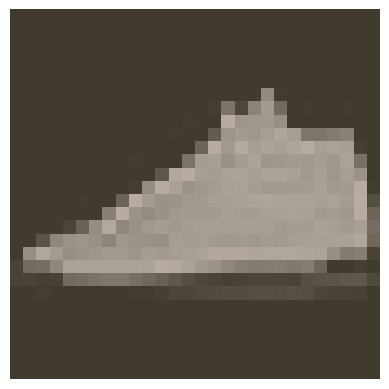

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [4]:
# TODO: Define your network architecture here

import torch.nn as nn
import torch.nn.functional as F

# Define the network architecture
class FashionClassifier(nn.Module):
    def __init__(self):
        super(FashionClassifier, self).__init__()
        # Input to hidden layer 1
        self.fc1 = nn.Linear(784, 128)
        # Hidden layer 1 to hidden layer 2
        self.fc2 = nn.Linear(128, 64)
        # Hidden layer 2 to output layer
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # Flatten the input tensor
        x = x.view(x.size(0), -1)  # (batch_size, 784)
        # Pass through the first hidden layer and apply ReLU activation
        x = F.relu(self.fc1(x))
        # Pass through the second hidden layer and apply ReLU activation
        x = F.relu(self.fc2(x))
        # Pass through the output layer and apply LogSoftmax activation
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

# Create an instance of the network
model = FashionClassifier()
print(model)


FashionClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [5]:
# TODO: Create the network, define the criterion and optimizer

import torch
from torch import nn, optim

# Define the network
class FashionClassifier(nn.Module):
    def __init__(self):
        super(FashionClassifier, self).__init__()
        # Input to hidden layer 1
        self.fc1 = nn.Linear(784, 128)
        # Hidden layer 1 to hidden layer 2
        self.fc2 = nn.Linear(128, 64)
        # Hidden layer 2 to output layer
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # Flatten the input tensor
        x = x.view(x.size(0), -1)  # (batch_size, 784)
        # Pass through the first hidden layer and apply ReLU activation
        x = F.relu(self.fc1(x))
        # Pass through the second hidden layer and apply ReLU activation
        x = F.relu(self.fc2(x))
        # Pass through the output layer and apply LogSoftmax activation
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

# Create the network
model = FashionClassifier()

# Define the loss criterion
criterion = nn.NLLLoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Print summary
print(model)
print(f"Criterion: {criterion}")
print(f"Optimizer: {optimizer}")


FashionClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Criterion: NLLLoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [6]:
# TODO: Train the network here
import torch

# Define the number of epochs
epochs = 5

# Train the network
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten images into a 784-length vector
        images = images.view(images.shape[0], -1)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        logits = model(images)

        # Calculate the loss
        loss = criterion(logits, labels)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()
    
    # Print the average loss for the epoch
    print(f"Epoch {epoch + 1}/{epochs} - Training loss: {running_loss/len(trainloader):.4f}")


Epoch 1/5 - Training loss: 1.0426
Epoch 2/5 - Training loss: 0.5660
Epoch 3/5 - Training loss: 0.4933
Epoch 4/5 - Training loss: 0.4571
Epoch 5/5 - Training loss: 0.4325


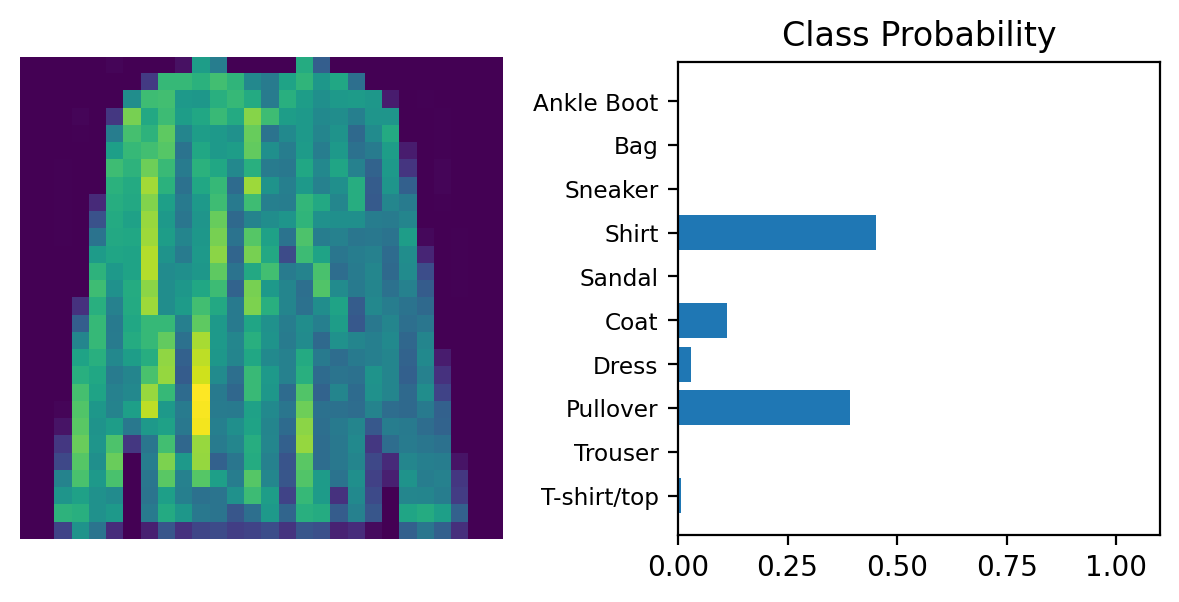

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img

# Disable gradient calculations for inference
with torch.no_grad():
    # Get the logits from the model
    logits = model(img)
    # Apply the softmax function to get probabilities
    ps = torch.exp(logits)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version="Fashion")